<a href="https://colab.research.google.com/github/zeniaclarissa/Text_Analysis_Final_Project/blob/main/Final_Project_zc2709.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing the Impact of COVID-19 on U.S. Financial News Sentiment: A Case Study of Investopedia News**

**Author:** Zenia Clarissa Bhaswata Putri (UNI: zc2709)

**Abstract:**

The COVID-19 pandemic caused significant disruptions in the U.S. global markets and economies, leading to widespread market volatility and uncertainty. Media coverage played a critical role in shaping public perception and investor sentiment during this period. U.S. financial news outlets, such as the Investopedia, covered key developments including market crashes, government stimulus measures, and economic impact in the U.S. Understanding how these articles produced by Investopedia portrayed the market and economic impacts of COVID-19 can provide valuable insights into the relationship between this particular news outlet narratives and market behavior.

**Objectives:**

The proposed research aims to analyze the sentiment on U.S. financial news articles from the Investopedia during the COVID-19 pandemic in 2020. By focusing on specific market events, financial news outlet and economic impacts during this period, this analysis will assess how Investopedia sentiment evolved in the U.S., especially in relation to financial markets. The goal is to uncover trends in Investopedia news tone regarding the pandemic's economic effects and understand the relationship between news coverage and market sentiment.

**Research Steps:**


*   Collect and analyze 5 Investopedia articles from 2020 that discuss COVID-19 and related market/financial/economic impacts in the U.S.
*   Perform sentiment analysis on the articles, categorizing the tone as positive, neutral, or negative.
*   Categorize the news based on event tagged/specified events.
*   Identify trends in media sentiment during major events, such as market crashes and stimulus announcements.

**Research Question:**

How did Investopedia as the U.S. financial news articles portray the economic impacts of COVID-19 in 2020, and what were the main trends and sentiment patterns at that time?

**Hypothesis:**

Sentiment in the Investopedia articles became increasingly negative leading up to major economic events, such as market crashes and rising COVID-19 cases.

**Data Collection Method:**
*   Source: [Investopedia](https://www.investopedia.com/).
*   Collection Method: Articles will be gathered using URL through web scraping, focusing on those containing keywords such as "COVID-19," "market crash", "stimulus", "U.S. economy", etc. The selected articles will cover major market and economic events throughout the pandemic.

**Data Analysis Methodology:**
*   **Text Pre-processing**: Use NLTK to clean and preprocess text, removing non-informative elements like stop words and punctuation.
*   **Word Cloud Analysis:** Use word clouds as a supplemental visualization to highlight frequently used terms during key events. I am using word clouds as a preliminary analysis step or to complement more rigorous quantitative findings.
*   **Sentiment Analysis:** Using VADER is appropriate here, as it is well-suited for news articles. Category Classification: Categorize sentiments into positive, negative, or neutral, and calculate an overall sentiment score for each article.
*   **Trend Analysis:** Event-Specific Sentiment Analysis: Analyze sentiment in relation to specific events (e.g., market crashes or stimulus packages) to observe if and how sentiment correlates with major economic milestones during the pandemic.


**Tools and Resources:**


1.   Pandas: Used for data cleaning, processing, manipulation, and visualization.
2. Programming Languages: Python for data collection, text processing, and analysis.
3.   Glob: Used to connect to directories on the OS and search for files containing relevant Investopedia articles.
4. Libraries: BeautifulSoup for web scraping, NLTK for text analysis, VADER or TextBlob for sentiment analysis.
5. Word Cloud: Used to create visual representations of word frequencies in the articles.
6. Matplotlib: Used to visualize the word clouds and plot sentiment trends.
7. Plotly express: Used for visualization and interactive visualization
8. VADER: Used for sentiment analysis
9. Using chatGPT: Used for incremental questions in Trend Analysis

# **Data Collection**

**URL Web Scraping Text**

I used the Beautiful Soup library to webscrape the HTML text from the URL lists then saved them as text files. The following code is adapted from [Krisel 2024](https://github.com/rskrisel/webscraping/blob/main/web_scraping.ipynb):

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
##Importing all necessary packages
import glob
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests
from bs4 import BeautifulSoup

In [4]:
!pip install --upgrade nltk

In [5]:
import requests

In [6]:
data_df = pd.read_csv("/content/drive/MyDrive/Intro to Text Analysis in Python/URL_investopedia.csv", delimiter=',', encoding='utf-8')

In [7]:
data_df

URL
0  https://www.investopedia.com/investing-lessons...
1  https://www.investopedia.com/government-stimul...
2  https://www.investopedia.com/hopes-of-a-v-shap...
3  https://www.investopedia.com/how-the-pandemic-...
4  https://www.investopedia.com/timeline-of-stock...

In [8]:
def scrape_article(url):
    response = requests.get(url)
    response.encoding = 'utf-8'
    html_string = response.text
    return html_string

In [9]:
data_df["text"] = data_df["URL"].apply(scrape_article)

In [10]:
data_df

URL  \
0  https://www.investopedia.com/investing-lessons...   
1  https://www.investopedia.com/government-stimul...   
2  https://www.investopedia.com/hopes-of-a-v-shap...   
3  https://www.investopedia.com/how-the-pandemic-...   
4  https://www.investopedia.com/timeline-of-stock...   

                                                text  
0  <!DOCTYPE html>\n<html id="newsScTemplate_1-0"...  
1  <!DOCTYPE html>\n<html id="newsScTemplate_1-0"...  
2  <!DOCTYPE html>\n<html id="newsScTemplate_1-0"...  
3  <!DOCTYPE html>\n<html id="newsScTemplate_1-0"...  
4  <!DOCTYPE html>\n<html id="structuredContentTe...

In [11]:
##Use Beautiful Soup to extract the text
for text in data_df["text"]:
    soup = BeautifulSoup(text)
    article = soup.get_text()

In [12]:
for index, row in data_df.iterrows():
    text = row['text']
    soup = BeautifulSoup(text)
    article = soup.get_text()

    with open(f"/content/drive/MyDrive/Intro to Text Analysis in Python/all_articles_investopedia.txt", "w") as file:
        file.write(str(article))

In [13]:
import requests

In [14]:
data_df.dtypes

URL     object
text    object
dtype: object

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     5 non-null      object
 1   text    5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [16]:
for text in data_df["text"]:
    print(text)

<!DOCTYPE html>
<html id="newsScTemplate_1-0" class="comp newsScTemplate structuredContentTemplate html mntl-html no-js article-journey " data-finance-resource-version="2.181.0" data-ab="99,99,99,99,99,99,99,99,99,99,99,62,99,99,99,99,99,55,99,99,99" data-mm-transactional-resource-version="1.14.22" data-mm-ads-resource-version="1.2.168" data-mm-video-resource-version="1.4.19" data-mantle-resource-version="4.0.764" lang="en" data-tracking-container="true" data-resource-version="2.181.0"><!--
<globe-environment environment="k8s-prod" application="finance" dataCenter="us-west-1"/>
-->
<head class="loc head">
<link rel="preconnect" href="//js-sec.indexww.com">
<link rel="preconnect" href="//c.amazon-adsystem.com">
<link rel="preconnect" href="//securepubads.g.doubleclick.net">
<link rel="dnsprefetch" href="//www.google-analytics.com">
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="robots" content="max-image-preview:large, NOODP, NOYDIR" />
<meta na

In [17]:
print(article)












Timeline of U.S. Stock Market Crashes




















































 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 







Skip to content
















 




 Investing



 Stocks
 

 Cryptocurrency
 

 Bonds
 

 ETFs
 

 Options and Derivatives
 

 Commodities
 

 Trading
 

 Automated Investing
 

 Brokers
 

 Fundamental Analysis
 

 Markets
 

 View All
 



 Simulator



 Login / Portfolio
 

 Trade
 

 Research
 

 My Games
 

 Leaderboard
 



 Banking



 Savings Accounts
 

 Certificates of Deposit (CDs)
 

 Money Market Accounts
 

 Checking Accounts
 

 View All
 



 Personal Finance



 Budgeting and Saving
 

 Personal Loans
 

 Insurance
 

 Mortgages
 

 Credit and Debt
 

 Student Loans
 

 Taxes
 

 Credit Cards
 

 Financial Literacy
 

 Retirement
 

 View All
 



 Economy



 Government and Policy
 

 Monetary Policy
 

 Fiscal Policy
 

 Economics
 

 View All
 



 News



 Markets
 

 Compan

# **Data Pre-processing**

When preprocessing the text data, I cleaned up the content to make it easier for analysis. This involved several steps: remove all the excess line spacing in the document, define custom stop words, lowercase the text, tokenize the text, remove punctuations and stop words, join tokens back to string. The following code is adapted from [Krisel 2024](https://https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb):

**Text Pre-processing**

In [18]:
# Download the required resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
stops = stopwords.words('english')



lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()  # Get the first letter of the POS tag
    tag_dict = {
        'J': wordnet.ADJ,  # Adjective
        'N': wordnet.NOUN,  # Noun
        'V': wordnet.VERB,  # Verb
        'R': wordnet.ADV    # Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if not found

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import glob

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
filepath = "/content/drive/MyDrive/Intro to Text Analysis in Python/all_articles_investopedia.txt"

In [20]:
text = open(filepath, encoding='utf-8').read()
type(text)

str

In [21]:
##First remove all the excess line spacing in the document, so I can add my own later
text_unspaced = text.replace('\n'," ")

In [22]:
text_unspaced

'           Timeline of U.S. Stock Market Crashes                                                                                                                                               Skip to content                        Investing     Stocks     Cryptocurrency     Bonds     ETFs     Options and Derivatives     Commodities     Trading     Automated Investing     Brokers     Fundamental Analysis     Markets     View All       Simulator     Login / Portfolio     Trade     Research     My Games     Leaderboard       Banking     Savings Accounts     Certificates of Deposit (CDs)     Money Market Accounts     Checking Accounts     View All       Personal Finance     Budgeting and Saving     Personal Loans     Insurance     Mortgages     Credit and Debt     Student Loans     Taxes     Credit Cards     Financial Literacy     Retirement     View All       Economy     Government and Policy     Monetary Policy     Fiscal Policy     Economics     View All       News     Markets     Compa

In [23]:
# Define custom stop words, including frequent financial terms
custom_stop_words = set(stopwords.words('english'))
custom_stop_words.update(["stock", "market", "company", "shares", "price", "financial", "economy", "investment", "growth"])

In [24]:
# Text preprocessing function
def preprocess_text(text_unspaced):
    # Lowercase the text
    text = text.lower()

    # Tokenize the text
    word_tokens = word_tokenize(text)

    # Remove punctuation and stop words
    filtered_tokens = [word for word in word_tokens if word.isalnum() and word not in custom_stop_words]

    # Join tokens back to string
    cleaned_text = ' '.join(filtered_tokens)

    return cleaned_text

# **Data Analysis**

I created Word Clouds analysis as the pre-eliminary analysis to find frequent words used in the articles. The following code is also adapted from [Krisel 2024](https://https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb):

**Word Clouds Analysis**

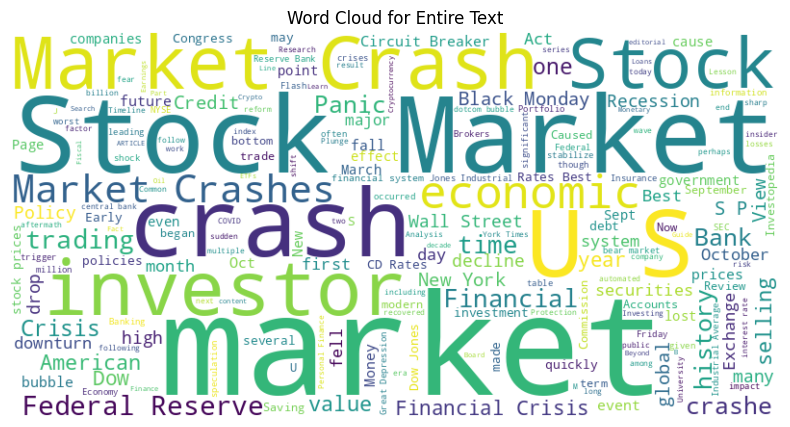

In [25]:
# Generate a word cloud for the entire text
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_unspaced)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Entire Text")
plt.show()

Word clouds highlighted the frequent terms during major economic events, such as “financial crisis,” “market crash,” and “stock market.” This visual representation provided a qualitative understanding of the key themes discussed in the articles. The code is also adapted from Krisel 2024.

**Sentiment Analysis**

Then, I started to do the sentiment analysis by installing and downloading the VADER resource, and calculate the sentiment scores using tokenize. This following code is adapted from [Krisel 2024](https://github.com/rskrisel/sentiment_analysis_workshop/blob/main/sentiment_analysis.ipynb):

In [26]:
# Download VADER resource
nltk.download('vader_lexicon')

# Sample data (replace with your dataset of cleaned articles)
data = text_unspaced

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [27]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

**Calculate Sentiment Scores**

In [29]:
# Break text into sentences
sentences = nltk.sent_tokenize(text_unspaced)

# Make empty list to store sentence scores
sentence_scores = []

# Get each sentence and sentence number
for number, sentence in enumerate(sentences):
    # Use VADER to calculate sentiment
    scores = sentimentAnalyser.polarity_scores(sentence)  # Corrected the name to match the initialized variable
    # If keywords suggest negative sentiment, adjust the score if necessary
    if 'crash' in sentence.lower() or 'recession' in sentence.lower() or 'crisis' in sentence.lower():
        if scores['compound'] == 0:
            scores['compound'] = -0.1  # Ensure that sentences with strong negative words aren't neutral
    # Make dictionary and append it to the previously empty list
    sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})


In [30]:
pd.DataFrame(sentence_scores)

sentence  sentence_number  \
0               Timeline of U.S. Stock Market Crash...                1   
1    Search   Search            Please fill out thi...                2   
2    Investing           Investing      Stocks     ...                3   
3    He has five years of professional editing, pro...                4   
4    Ward regularly contributes to stories about go...                5   
..                                                 ...              ...   
381  more Pink Market: Listings for Stocks That Tra...              382   
382  more Super Bowl Indicator: Premise and History...              383   
383  more                                      Abou...              384   
384  By clicking “Accept All Cookies”, you agree to...              385   
385  Privacy PolicyCookies Settings Accept All Cookies              386   

     sentiment_score  
0             0.9927  
1             0.3182  
2             0.9784  
3             0.0000  
4             0.0000  
..               ...  
381           0.0000  
382           0.9184  
383           0.5766  
384           0.3612  
385           0.3818  

[386 rows x 3 columns]

**10 most negative sentences**

In [31]:
# Assign DataFrame to variable red_df
news_df = pd.DataFrame(sentence_scores)

# Sort by the column "sentiment_score" and slice for first 10 values
news_df.sort_values(by="sentiment_score")[:10]

sentence  sentence_number  \
368  Timeline of U.S. Stock Market Crashes  CURRENT...              369   
14   Timeline of U.S. Stock Market Crashes  CURRENT...               15   
201  Legacies of the 2008 Financial Crisis    The c...              202   
223  Economic effects of the Sept. 11 attacks: The ...              224   
184  The crash also hit the broader economy, contri...              185   
189  The 2008 Financial Crisis    The 2008 financia...              190   
215  Other Notable Downturns    Below is a list of ...              216   
262  "Crisis Chronicles: Central Bank Crisis Manage...              263   
190  What began with problems in subprime mortgages...              191   
22   Key Takeaways Market crashes can lead to deep ...               23   

     sentiment_score  
368          -0.9868  
14           -0.9868  
201          -0.9501  
223          -0.9231  
184          -0.9201  
189          -0.9081  
215          -0.8990  
262          -0.8979  
190          -0.8885  
22           -0.8807

**10 most positive sentences**

In [32]:
# Sort by the column "sentiment_score," this time in descending order, and slice for first 10 values
news_df.sort_values(by='sentiment_score', ascending=False)[:10]

sentence  sentence_number  \
0               Timeline of U.S. Stock Market Crash...                1   
2    Investing           Investing      Stocks     ...                3   
382  more Super Bowl Indicator: Premise and History...              383   
106  Company executives regularly concealed vital i...              107   
53   That said, many are triggered by a combination...               54   
123  But, that year and next, Congress passed the S...              124   
237  In fact, over the last 20 years, October has b...              238   
90   The U.S. Federal Reserve, or "Fed," was design...               91   
72   During the mid-1630s, tulips became widely pop...               73   
107  Without a federal regulator like today's U. S....              108   

     sentiment_score  
0             0.9927  
2             0.9784  
382           0.9184  
106           0.8591  
53            0.8271  
123           0.7964  
237           0.7783  
90            0.7688  
72            0.7579  
107           0.7184

In [33]:
news_df

sentence  sentence_number  \
0               Timeline of U.S. Stock Market Crash...                1   
1    Search   Search            Please fill out thi...                2   
2    Investing           Investing      Stocks     ...                3   
3    He has five years of professional editing, pro...                4   
4    Ward regularly contributes to stories about go...                5   
..                                                 ...              ...   
381  more Pink Market: Listings for Stocks That Tra...              382   
382  more Super Bowl Indicator: Premise and History...              383   
383  more                                      Abou...              384   
384  By clicking “Accept All Cookies”, you agree to...              385   
385  Privacy PolicyCookies Settings Accept All Cookies              386   

     sentiment_score  
0             0.9927  
1             0.3182  
2             0.9784  
3             0.0000  
4             0.0000  
..               ...  
381           0.0000  
382           0.9184  
383           0.5766  
384           0.3612  
385           0.3818  

[386 rows x 3 columns]

# **Trend Analysis**

I classified the words on the sentences into an event-specific tagged, for example words like "financial crisis", "recession" are classified as economic downturn. "Market lose", "market crash" as market crash, etc. The following code is adapted from [Krisel 2024](https://github.com/rskrisel/sentiment_analysis_workshop/blob/main/sentiment_analysis.ipynb) with a help from [ChatGPT](https://chatgpt.com/) to build the pie chart script using the following prompts: *(refine this code on transforming this news_df dataframe into a pie chart based on sentiment scores: positive, negative, and neutral count positive_count = len(news_df[news_df['sentiment_score'] > 0])
negative_count = len(news_df[news_df['sentiment_score'] < 0])
neutral_count = len(news_df[news_df['sentiment_score'] == 0]))*


In [34]:
# Create a DataFrame from the sentence scores
news_df = pd.DataFrame(sentence_scores)

# Define event tags based on keywords
def tag_event(sentence):
    if "financial crisis" in sentence.lower() or "recession" in sentence.lower() or "crisis" in sentence.lower():
        return "Economic Downturn"
    elif "investment" in sentence.lower() or "stocks" in sentence.lower() or "bonds" in sentence.lower():
        return "Market Stimulus"
    elif "lose" in sentence.lower() or "crashes" in sentence.lower() or "falls" in sentence.lower() or "shocks" in sentence.lower() or "overheated" in sentence.lower() or "trigger" in sentence.lower():
        return "Market Crash"
    elif "tax" in sentence.lower() or "fiscal" in sentence.lower() or "government" in sentence.lower():
        return "Fiscal Policy"
    elif "monetary" in sentence.lower() or "interest rate cuts" in sentence.lower() or "stabilize" in sentence.lower() or "bailout" in sentence.lower():
        return "Monetary Policy"
    elif "bank" in sentence.lower() or "central bank" in sentence.lower():
        return "Banking"
    elif "stimulus" in sentence.lower() or "safeguards" in sentence.lower() or "corrections" in sentence.lower() or "catalysts" in sentence.lower() or "opportunities" in sentence.lower():
        return "Economic Stimulus"
    elif "vaccine" in sentence.lower() or "vaccine news" in sentence.lower() or "vaccine announcement" in sentence.lower():
        return "Vaccine Announcement"
    else:
        return "Other"

# Apply the event tagging function to the DataFrame
news_df["event_tag"] = news_df["sentence"].apply(tag_event)

# Print the DataFrame with event tags
news_df

sentence  sentence_number  \
0               Timeline of U.S. Stock Market Crash...                1   
1    Search   Search            Please fill out thi...                2   
2    Investing           Investing      Stocks     ...                3   
3    He has five years of professional editing, pro...                4   
4    Ward regularly contributes to stories about go...                5   
..                                                 ...              ...   
381  more Pink Market: Listings for Stocks That Tra...              382   
382  more Super Bowl Indicator: Premise and History...              383   
383  more                                      Abou...              384   
384  By clicking “Accept All Cookies”, you agree to...              385   
385  Privacy PolicyCookies Settings Accept All Cookies              386   

     sentiment_score          event_tag  
0             0.9927    Market Stimulus  
1             0.3182              Other  
2             0.9784  Economic Downturn  
3             0.0000              Other  
4             0.0000      Fiscal Policy  
..               ...                ...  
381           0.0000    Market Stimulus  
382           0.9184              Other  
383           0.5766              Other  
384           0.3612              Other  
385           0.3818              Other  

[386 rows x 4 columns]

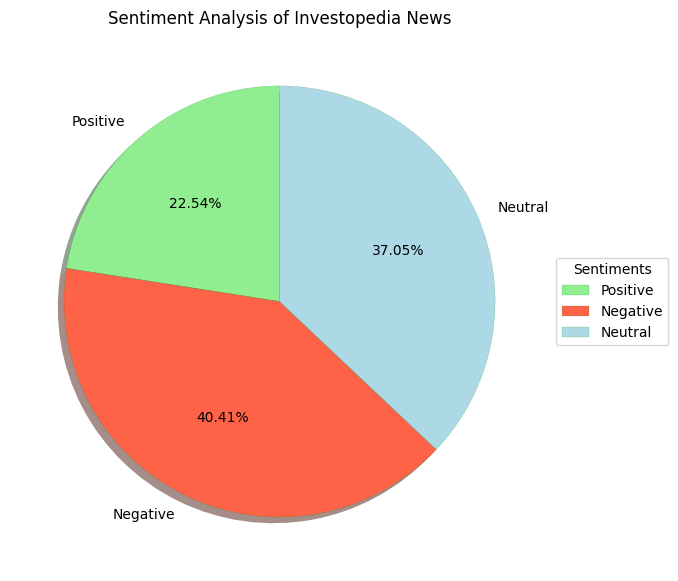

In [35]:
# Creating the dataset for the pie chart based on sentiment scores
positive_count = len(news_df[news_df['sentiment_score'] > 0])
negative_count = len(news_df[news_df['sentiment_score'] < 0])
neutral_count = len(news_df[news_df['sentiment_score'] == 0])

# Creating the dataset for the pie chart
data_sentiment = [positive_count, negative_count, neutral_count]
labels = ['Positive', 'Negative', 'Neutral']

# Wedge properties
wp = { 'linewidth' : 0.1, 'edgecolor' : "green" }

# Creating the pie chart
fig, ax = plt.subplots(figsize =(10, 7))
ax.pie(data_sentiment,
       autopct='%1.2f%%',
       labels=labels,
       shadow=True,
       colors=("lightgreen", "tomato", "lightblue"),
       startangle=90,
       wedgeprops=wp)

# Adding a legend
ax.legend(labels,
          title="Sentiments",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Setting the title
ax.set_title("Sentiment Analysis of Investopedia News")

# Display the plot
plt.show()


Overall sentiment trends by event in the Investopedia News are classified as having negative sentiment, which not only reflects market sentiment but can also influence investor behavior during crises.

**Sentiment Trends based on Specific Event Tags**

The sentiment scores were categorized by event tags such as “Market Crash,” “Economic Downturn", "Fiscal Policy", "Monetary Policy", "Banking", "Market", "Economic Stimulus", "Vaccine Announcement", and "Other". The average sentiment score was plotted for each category (see below) as the following code is adapted from [Krisel 2024](https://github.com/rskrisel/sentiment_analysis_workshop/blob/main/sentiment_analysis.ipynb):

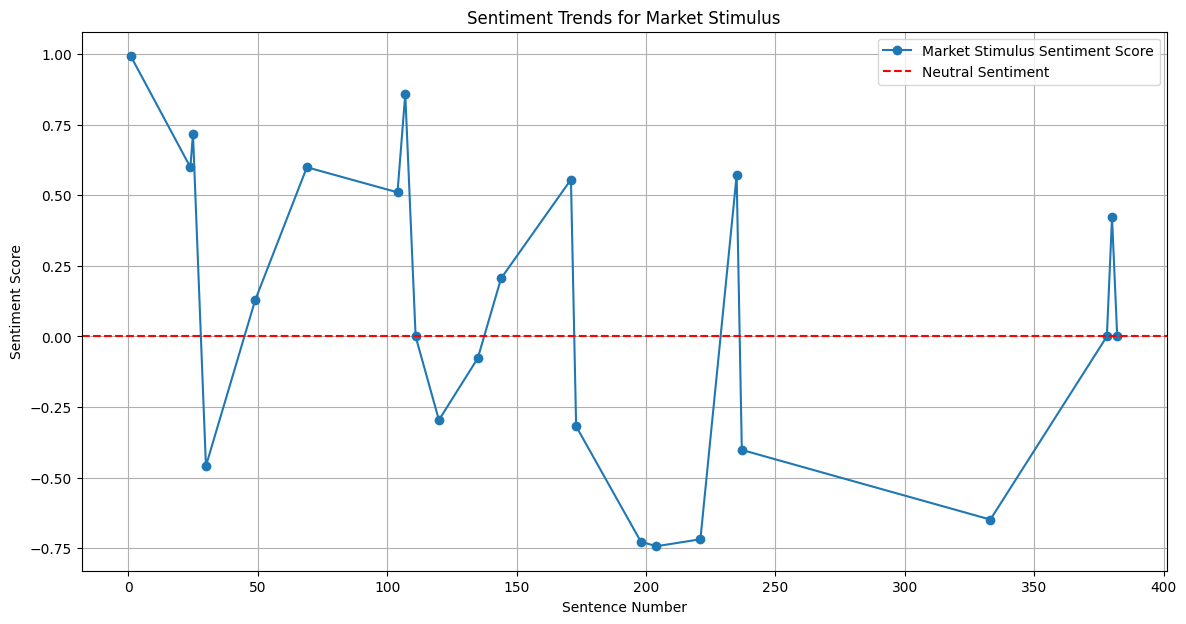

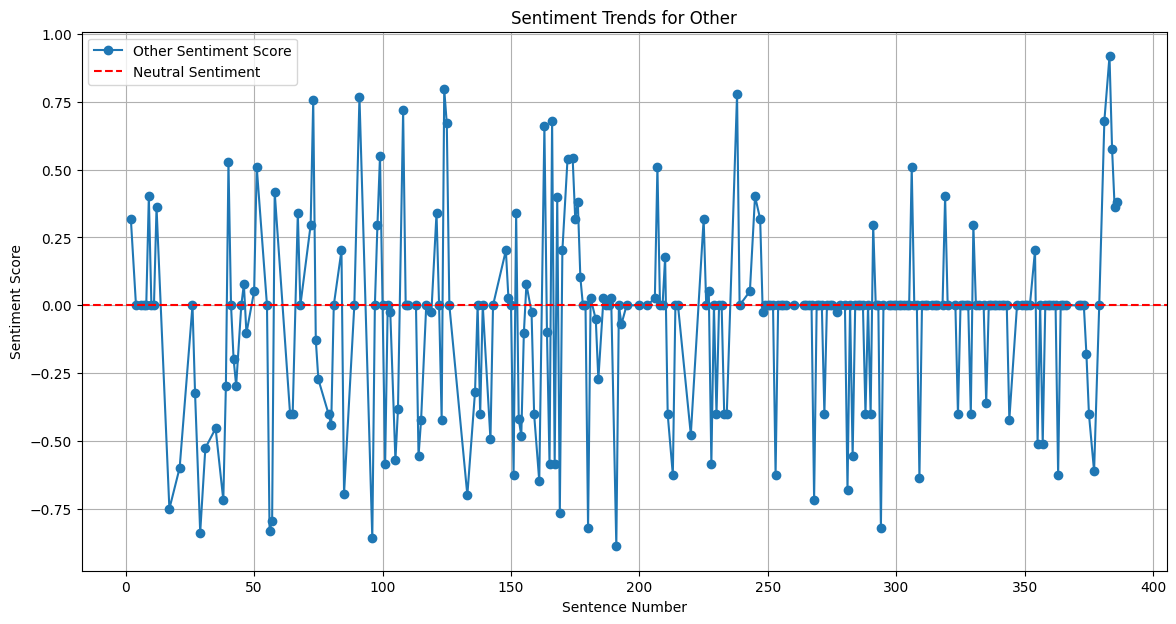

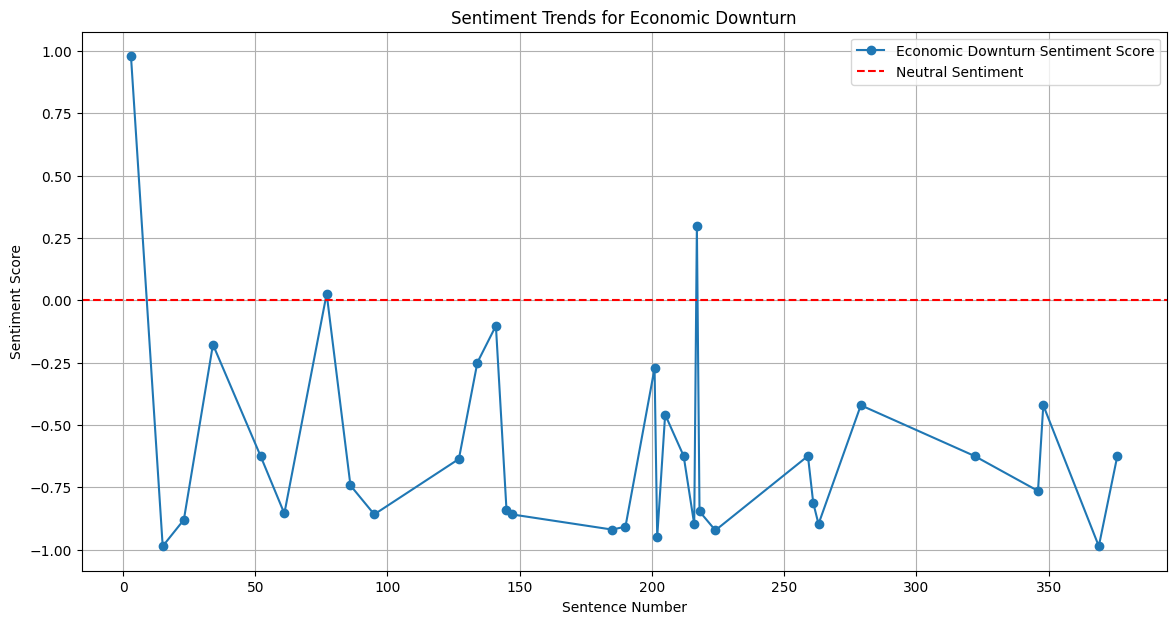

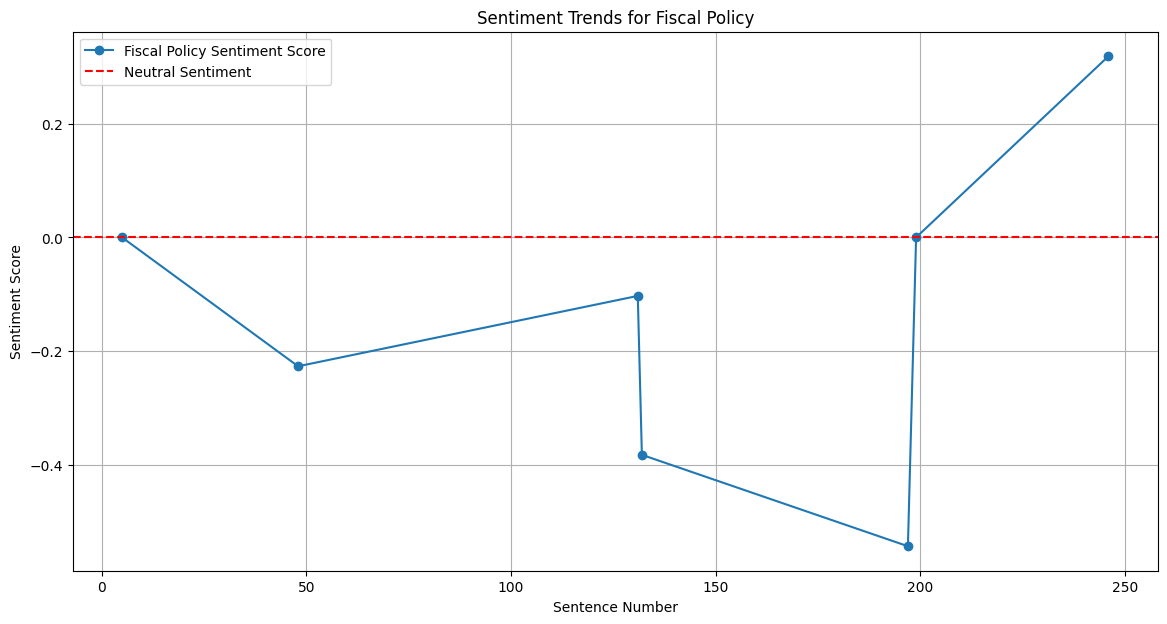

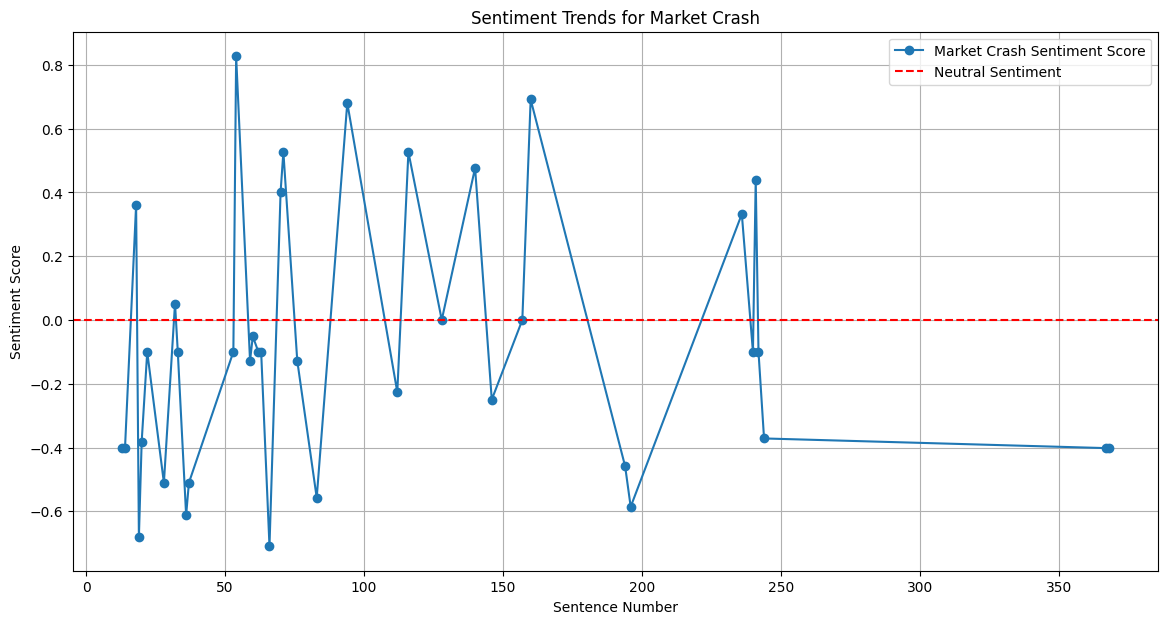

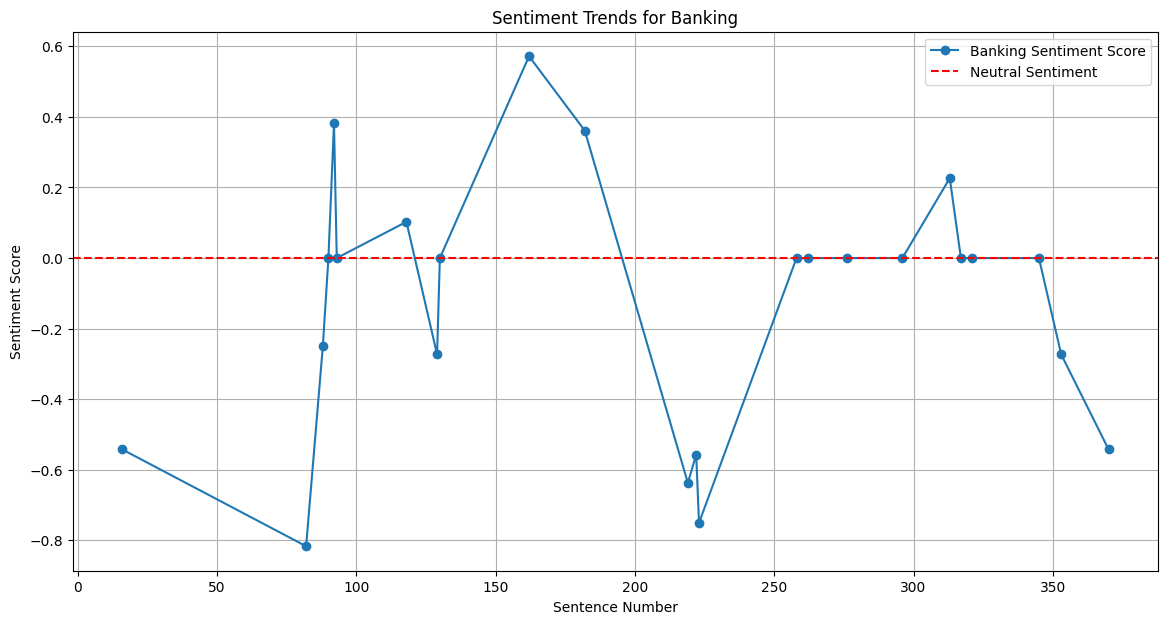

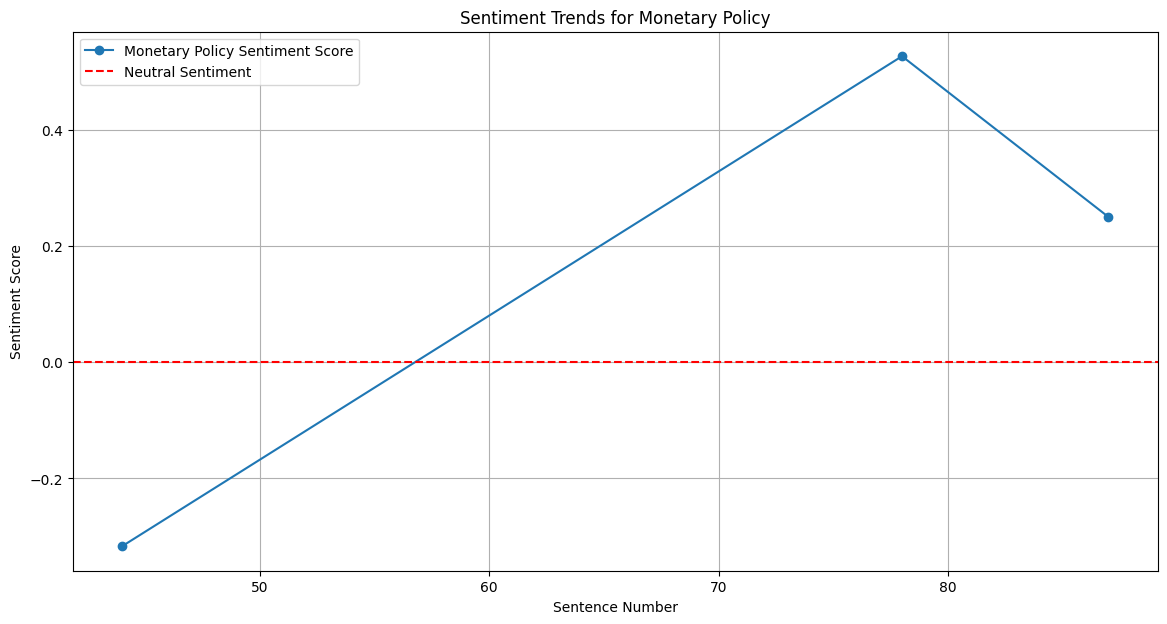

In [36]:
# Plot sentiment trends for specific event tags using chatGPT to help me create separate visualization for each event tagged
# I gave chatGPT the usual code for one chart and then I asked them to create different code for different event tagged
events = news_df['event_tag'].unique()
for event in events:
    event_df = news_df[news_df['event_tag'] == event]
    plt.figure(figsize=(14, 7))
    plt.plot(event_df['sentence_number'], event_df['sentiment_score'], label=f'{event} Sentiment Score', linestyle='-', marker='o')
    plt.xlabel('Sentence Number')
    plt.ylabel('Sentiment Score')
    plt.title(f'Sentiment Trends for {event}')
    plt.axhline(y=0, color='r', linestyle='--', label='Neutral Sentiment')
    plt.legend()
    plt.grid(True)
    plt.show()

There were distinct dips in sentiment scores during significant events like market crashes or announcements of negative economic indicators (such as economic downturn). Conversely, there were positive spikes during discussions of potential recovery, such as market stimulus and monetary policy. While "banking" remain neutral to show the neutrality of the event tagged related to the banks and central banks.

**Average Sentiment Trends over Sentences**

I used sentiment plot using rolling mehod, by using a rolling average, since it captures the overall sentiment trends during the period of the 2020 COVID-19 pandemic, making it easier to me to observe key peaks and dips without the distracting noise of individal fluctuations. This code was adapted from [Krisel 2024](https://github.com/rskrisel/sentiment_analysis_workshop/blob/main/sentiment_analysis.ipynb):

In [37]:
import plotly.express as px

In [38]:
news_df["news_roll"] = news_df.rolling(5)["sentiment_score"].mean()

In [39]:
fig = px.line(news_df, x='sentence_number', y="news_roll",
             title= "Sentiment Scores Over Time (2020 COVID Market/Economic News from Investopedia)")
fig.show()

By using a rolling average, it captures the overall sentiment trends during the period of the 2020 COVID-19 pandemic, making it easier to observe key peaks and dips without the distracting noise of individual fluctuations

**Average Sentiment Trends by Event Tag**

The final analysis is to make an average overall sentiment trends by event tag to wrap up all the sentiment analysis before:

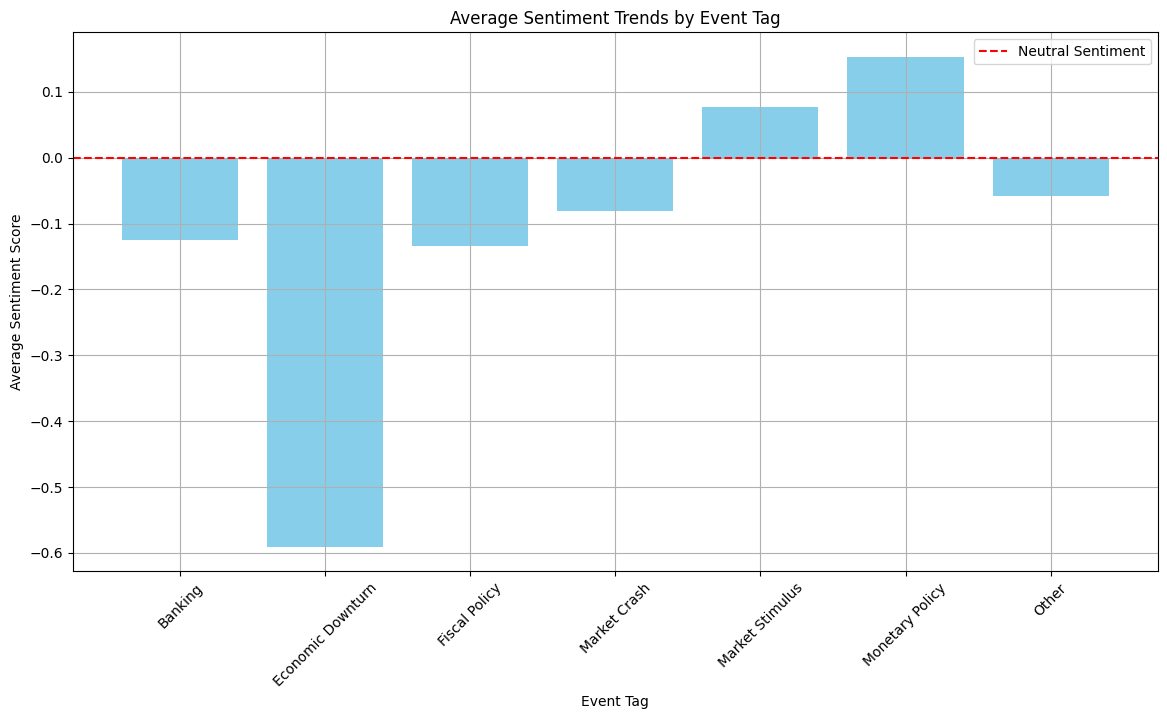

In [40]:
# Calculate and plot average sentiment trends for all event tags combined
# I self-designed this function
avg_sentiment = news_df.groupby('event_tag')['sentiment_score'].mean().reset_index()
plt.figure(figsize=(14, 7))
plt.bar(avg_sentiment['event_tag'], avg_sentiment['sentiment_score'], color='skyblue')
plt.xlabel('Event Tag')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Trends by Event Tag')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='--', label='Neutral Sentiment')
plt.legend()
plt.grid(True)
plt.show()

As expected, tags related to crises like “Market Crash” and “Economic Downturn” had noticeably negative sentiment scores, while “Market Stimulus” and “Monetary Policy” showed comparatively positive or neutral scores.

# **Discussion of Result**


*   During crises, the tone became overwhelmingly negative, mirroring market uncertainty and public anxiety;
*   Positive sentiment emerged during recovery discussions, suggesting that news narratives responded dynamically to economic conditions.


This indicates that financial news not only reflects market sentiment but can also influence investor behavior during crises.




# **Research Question Answered**

Research Question: How did U.S. financial news articles from Investopedia portray the economic impacts of COVID-19 in 2020, and what were the main trends and sentiment patterns at that time?

Answer: The U.S. financial news articles from Investopedia portrayed the economic impacts of COVID-19 in 2020 with an increasingly negative sentiment leading up to and during major economic downturns. During market crashes, such as the one in March 2020, and rising COVID-19 cases, there was a significant drop in sentiment scores, indicating growing pessimism. The articles reflected a narrative of uncertainty and concern, especially around major crises and economic instability.

However, when events were related to economic recovery efforts—such as government stimulus announcements or vaccine news—the sentiment showed an uptick, suggesting a more hopeful outlook. These patterns show how news sentiment was reactive to the changing economic environment, portraying both the fear surrounding downturns and cautious optimism around positive economic interventions.



# **Conclusion**

The study concludes that the sentiment of Investopedia as an U.S. financial news outlet in 2020 was closely linked to the unfolding of major economic events during the pandemic. The sentiment was notably negative during times of market crisis and more positive during discussions of recovery efforts, such as stimulus measures and vaccine announcements. These findings support the hypothesis that media sentiment became increasingly negative during periods of heightened economic uncertainty, reflecting the overall mood of the financial markets and the public.

This analysis also highlights how financial news (in this case in Investopedia) can serve as a reflection of, and even a driver of, investor sentiment during crises. The correlation between sentiment and market conditions points to the powerful impact of news coverage on shaping economic outlooks and market behavior. Understanding these dynamics can be valuable for financial analysts, policymakers, and investors who need to assess the influence of media on market sentiment.

**Next Step**

For future research, expanding the analysis to mupltiple news sources or comparing sentiment during other crises, such as the 2008 financial crash, could provide further insights into several media behavior during economic disruptions.